In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from src.vae_mi import *
from src.vae import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
train_dataset = np.load("./datasets/FireEvac_train_set.npy")
test_dataset = np.load("./datasets/FireEvac_test_set.npy")

max_train_dataset = np.max(train_dataset, axis=0)
min_train_dataset = np.min(train_dataset, axis=0)
max_test_dataset = np.max(test_dataset, axis=0)
min_test_dataset = np.min(test_dataset, axis=0)



In [3]:
range_train_dataset = max_train_dataset - min_train_dataset
range_test_dataset = max_test_dataset - min_test_dataset
train_dataset = ((train_dataset - min_train_dataset)/ range_train_dataset).astype('float32')
test_dataset = ((test_dataset - min_test_dataset) / range_test_dataset).astype('float32')


In [4]:
test_size = len(test_dataset)
train_size = len(train_dataset)

In [5]:
batch_size = 1024
train_loader = torch.utils.data.DataLoader(train_dataset,drop_last=False,
                                           batch_size=batch_size, shuffle=True)

print(len(train_loader))
test_loader = torch.utils.data.DataLoader(test_dataset,drop_last=False,
                                           batch_size=test_size, shuffle=True)

3


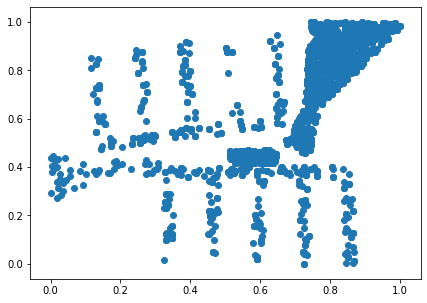

In [6]:
plot_fire_evac_dataset(train_dataset)

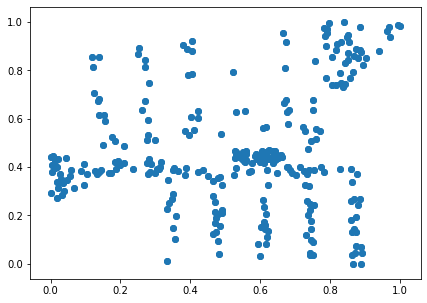

In [7]:
plot_fire_evac_dataset(test_dataset)

In [8]:
max_epochs = 10001
show_step = 100
input_size = 2
output_size = 2
latent_dim = 2
en_hidden = [200,20]
de_hidden = [20,200]
gendata_size = 1000
vae = VAEmi(en_hidden, latent_dim, de_hidden, input_size, output_size)
opt = torch.optim.Adam(vae.parameters(), lr=1e-3, weight_decay=1e-5)

###
scheduler =  torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer=opt, mode='min', 
             patience=50, verbose=True, factor=0.5, min_lr =1e-7)
###

loss_train = []
loss_test = []
loss_epoch = 0
loss_test_epoch = 0

--------------------
Epoch 0
loss = 0.42868873476982117
original distribution


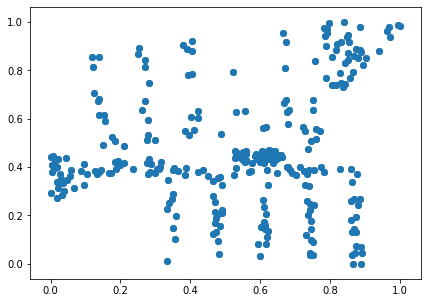

plot reconstruction distribution


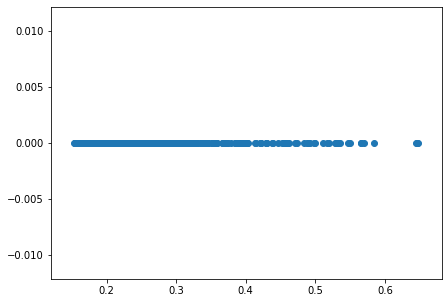

generate synthetic data


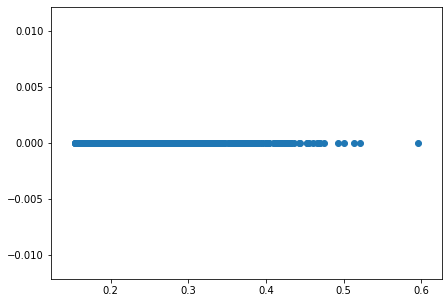

test loss = 0.21868375
--------------------
Epoch 1
loss = 0.3522498309612274
test loss = 0.18945384
--------------------
Epoch 2
loss = 0.3119443655014038
test loss = 0.2055033
--------------------
Epoch 3
loss = 0.3127366900444031
test loss = 0.21248913
--------------------
Epoch 4
loss = 0.29911136627197266
test loss = 0.19912247
--------------------
Epoch 5
loss = 0.28609001636505127
test loss = 0.1884683
--------------------
Epoch 6
loss = 0.28038445115089417
test loss = 0.1836236
--------------------
Epoch 7
loss = 0.2776450514793396
test loss = 0.18407471
--------------------
Epoch 8
loss = 0.27682051062583923
test loss = 0.18812166
--------------------
Epoch 9
loss = 0.27610376477241516
test loss = 0.18829924
--------------------
Epoch 10
loss = 0.27511847019195557
test loss = 0.18743241
--------------------
Epoch 11
loss = 0.2746427357196808
test loss = 0.18929522
--------------------
Epoch 12
loss = 0.2740563452243805
test loss = 0.19001311
--------------------
Epoch 13
loss 

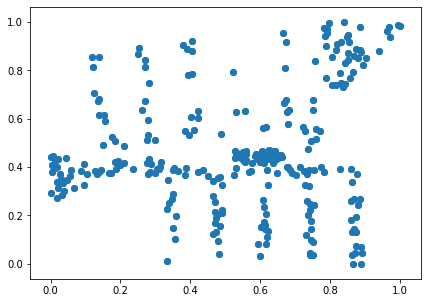

plot reconstruction distribution


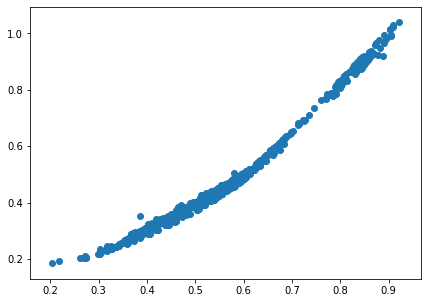

generate synthetic data


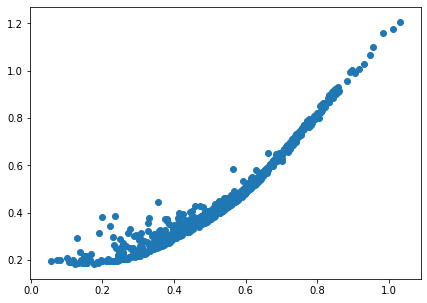

test loss = 0.032266762
--------------------
Epoch 101
loss = 0.012252770364284515
test loss = 0.032278884
--------------------
Epoch 102
loss = 0.012185287661850452
test loss = 0.03210251
--------------------
Epoch 103
loss = 0.012228033505380154
test loss = 0.03210041
--------------------
Epoch 104
loss = 0.012134352698922157
test loss = 0.031660676
--------------------
Epoch 105
loss = 0.01210445910692215
test loss = 0.031774163
--------------------
Epoch 106
loss = 0.012087410315871239
test loss = 0.031697035
--------------------
Epoch 107
loss = 0.011999773792922497
test loss = 0.031898454
--------------------
Epoch 108
loss = 0.01200157031416893
test loss = 0.031197958
--------------------
Epoch 109
loss = 0.011957642622292042
test loss = 0.031483144
--------------------
Epoch 110
loss = 0.01201114896684885
test loss = 0.031341728
--------------------
Epoch 111
loss = 0.011949367821216583
test loss = 0.030822175
--------------------
Epoch 112
loss = 0.011878522112965584
test loss

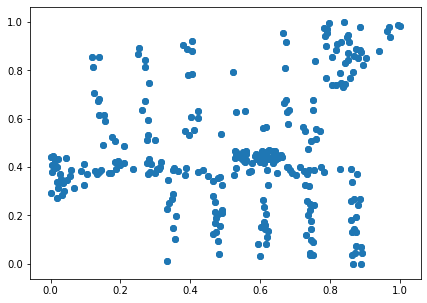

plot reconstruction distribution


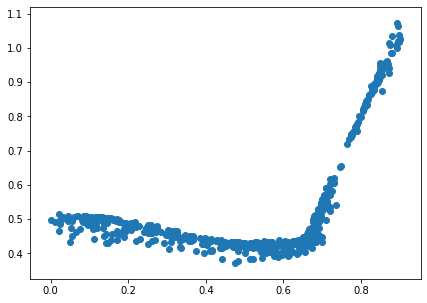

generate synthetic data


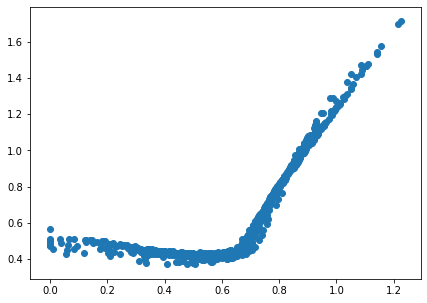

test loss = 0.023001708
--------------------
Epoch 201
loss = 0.009751754812896252
test loss = 0.02314962
--------------------
Epoch 202
loss = 0.009683065116405487
test loss = 0.023059424
--------------------
Epoch 203
loss = 0.009664949029684067
test loss = 0.02299679
--------------------
Epoch 204
loss = 0.009584465064108372
test loss = 0.023043681
--------------------
Epoch 205
loss = 0.009623989462852478
test loss = 0.022862675
--------------------
Epoch 206
loss = 0.009646915830671787
test loss = 0.023034686
--------------------
Epoch 207
loss = 0.00964326225221157
test loss = 0.022862261
--------------------
Epoch 208
loss = 0.00958041101694107
test loss = 0.022962986
--------------------
Epoch 209
loss = 0.009565947577357292
test loss = 0.022418505
--------------------
Epoch 210
loss = 0.009532179683446884
test loss = 0.022667067
--------------------
Epoch 211
loss = 0.009470519609749317
test loss = 0.022772405
--------------------
Epoch 212
loss = 0.009440365247428417
test los

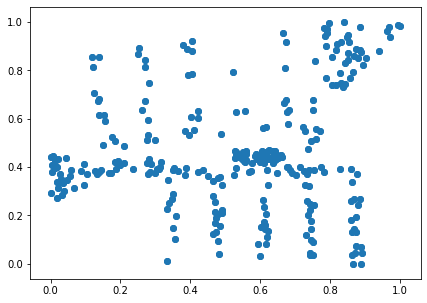

plot reconstruction distribution


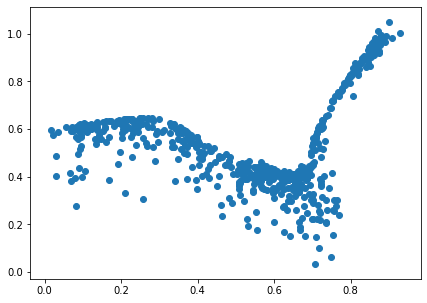

generate synthetic data


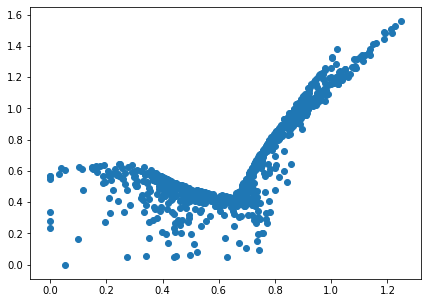

test loss = 0.019323893
--------------------
Epoch 301
loss = 0.007942482829093933
test loss = 0.019200426
--------------------
Epoch 302
loss = 0.007833436131477356
test loss = 0.017938228
--------------------
Epoch 303
loss = 0.007862415164709091
test loss = 0.018382065
--------------------
Epoch 304
loss = 0.007597891613841057
test loss = 0.017584926
--------------------
Epoch 305
loss = 0.007558874320238829
test loss = 0.01730355
--------------------
Epoch 306
loss = 0.007477460894733667
test loss = 0.017218895
--------------------
Epoch 307
loss = 0.007389237638562918
test loss = 0.017357886
--------------------
Epoch 308
loss = 0.007241968996822834
test loss = 0.016734214
--------------------
Epoch 309
loss = 0.0071131447330117226
test loss = 0.016111612
--------------------
Epoch 310
loss = 0.0069528864696621895
test loss = 0.015115747
--------------------
Epoch 311
loss = 0.006765537429600954
test loss = 0.0149421245
--------------------
Epoch 312
loss = 0.0067117768339812756
t

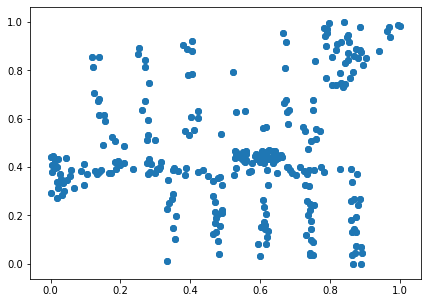

plot reconstruction distribution


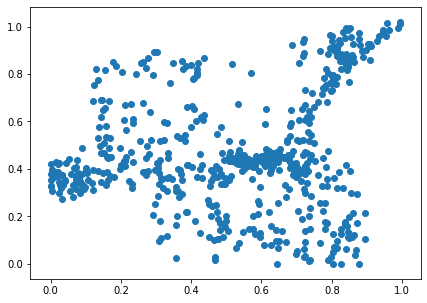

generate synthetic data


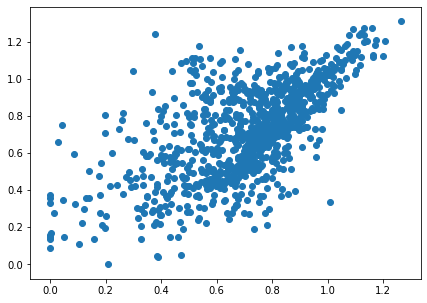

test loss = 0.00869726
--------------------
Epoch 401
loss = 0.004513473715633154
test loss = 0.008822153
--------------------
Epoch 402
loss = 0.004505514167249203
test loss = 0.00880473
--------------------
Epoch 403
loss = 0.0045334892347455025
test loss = 0.00886727
--------------------
Epoch 404
loss = 0.0045111943036317825
test loss = 0.008826998
--------------------
Epoch 405
loss = 0.004541962407529354
test loss = 0.008826046
--------------------
Epoch 406
loss = 0.004529172088950872
test loss = 0.008863137
--------------------
Epoch 407
loss = 0.00449406960979104
test loss = 0.008886919
--------------------
Epoch 408
loss = 0.004494491033256054
test loss = 0.008806684
--------------------
Epoch 409
loss = 0.004461407661437988
test loss = 0.00882938
--------------------
Epoch 410
loss = 0.004499789327383041
test loss = 0.008740487
--------------------
Epoch 411
loss = 0.004467735067009926
test loss = 0.008721573
--------------------
Epoch 412
loss = 0.004464669153094292
test lo

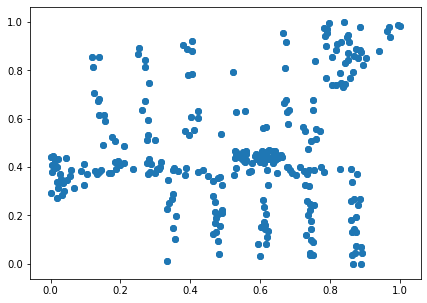

plot reconstruction distribution


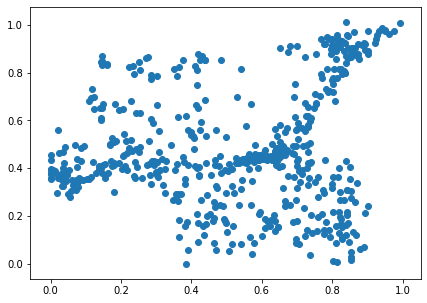

generate synthetic data


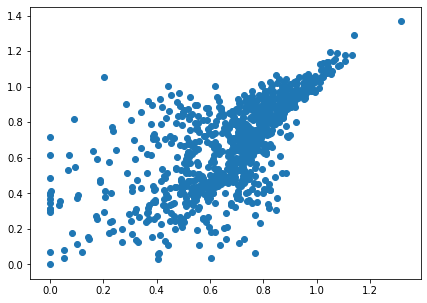

test loss = 0.008646757
--------------------
Epoch 501
loss = 0.004286283161491156
test loss = 0.008517928
--------------------
Epoch 502
loss = 0.004279010929167271
test loss = 0.008509176
--------------------
Epoch 503
loss = 0.004250001162290573
test loss = 0.008589482
--------------------
Epoch 504
loss = 0.0042412797920405865
test loss = 0.008625929
--------------------
Epoch 505
loss = 0.004237453453242779
test loss = 0.008625511
--------------------
Epoch 506
loss = 0.004205598961561918
test loss = 0.008582696
--------------------
Epoch 507
loss = 0.004235961940139532
test loss = 0.008676423
--------------------
Epoch 508
loss = 0.004266070201992989
test loss = 0.008468849
--------------------
Epoch 509
loss = 0.004220212809741497
test loss = 0.008613062
--------------------
Epoch 510
loss = 0.0042407698929309845
test loss = 0.008529963
--------------------
Epoch 511
loss = 0.004195589106529951
test loss = 0.008670043
--------------------
Epoch 512
loss = 0.004220996052026749
te

loss = 0.004166766069829464
original distribution


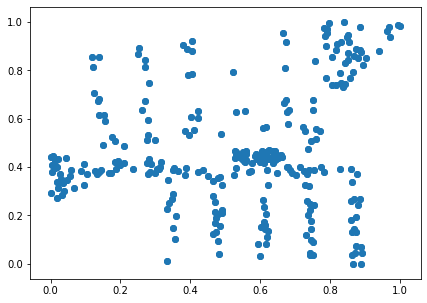

plot reconstruction distribution


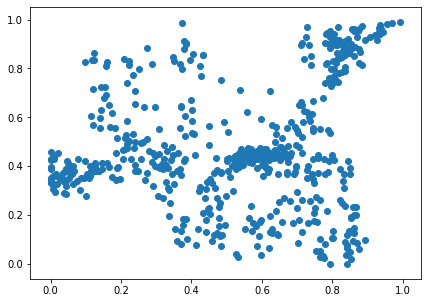

generate synthetic data


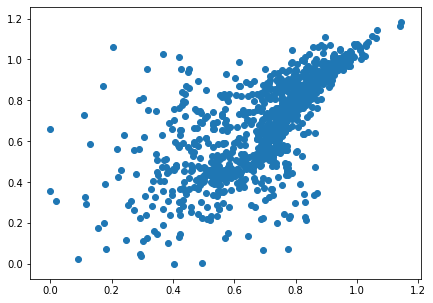

test loss = 0.008565442
--------------------
Epoch 601
loss = 0.004135757219046354
test loss = 0.008612794
--------------------
Epoch 602
loss = 0.004154508467763662
test loss = 0.008613949
--------------------
Epoch 603
loss = 0.004168217070400715
test loss = 0.008545662
--------------------
Epoch 604
loss = 0.004144557286053896
test loss = 0.008637339
--------------------
Epoch 605
loss = 0.004152282606810331
test loss = 0.008485889
--------------------
Epoch 606
loss = 0.004159894771873951
test loss = 0.008489031
--------------------
Epoch 607
loss = 0.004168035928159952
test loss = 0.008536381
--------------------
Epoch 608
loss = 0.004152060020714998
test loss = 0.008528754
--------------------
Epoch 609
loss = 0.004155964124947786
test loss = 0.008665987
--------------------
Epoch 610
loss = 0.004108943976461887
test loss = 0.008596998
--------------------
Epoch 611
loss = 0.004141826648265123
test loss = 0.008573701
--------------------
Epoch 612
loss = 0.0041701579466462135
tes

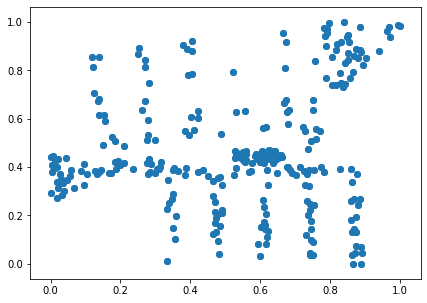

plot reconstruction distribution


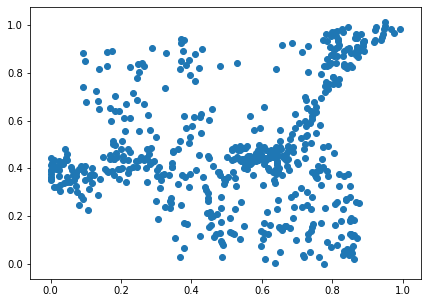

generate synthetic data


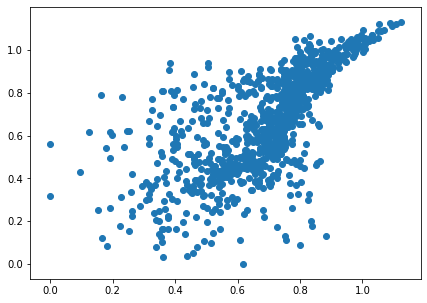

test loss = 0.008630363
--------------------
Epoch 701
loss = 0.004130141343921423
test loss = 0.008586287
--------------------
Epoch 702
loss = 0.004112127237021923
test loss = 0.008492781
--------------------
Epoch 703
loss = 0.004102407023310661
test loss = 0.008581839
--------------------
Epoch 704
loss = 0.004138168413192034
test loss = 0.008499536
--------------------
Epoch 705
loss = 0.00413009338080883
test loss = 0.008639342
--------------------
Epoch 706
loss = 0.004118493292480707
test loss = 0.008578495
--------------------
Epoch 707
loss = 0.00411928491666913
test loss = 0.008493434
--------------------
Epoch 708
loss = 0.004123114049434662
test loss = 0.008533131
--------------------
Epoch 709
loss = 0.004168220330029726
test loss = 0.008639277
--------------------
Epoch 710
loss = 0.004117689095437527
test loss = 0.008598968
--------------------
Epoch 711
loss = 0.004130012355744839
test loss = 0.008615209
--------------------
Epoch 712
loss = 0.004147971980273724
test l

test loss = 0.008535451
--------------------
Epoch 799
loss = 0.004113030154258013
test loss = 0.008578735
--------------------
Epoch 800
loss = 0.004085011314600706
original distribution


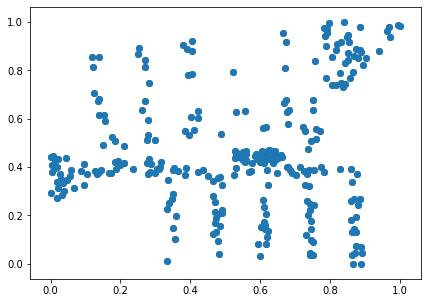

plot reconstruction distribution


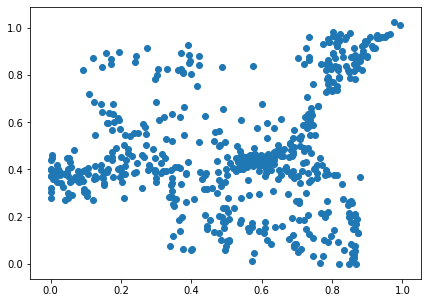

generate synthetic data


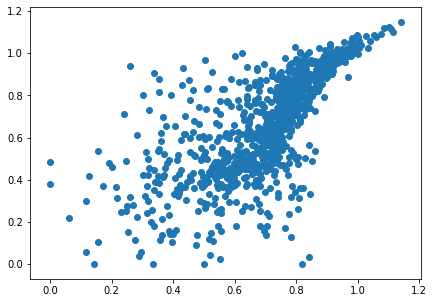

test loss = 0.008512936
--------------------
Epoch 801
loss = 0.004111355636268854
test loss = 0.008563272
--------------------
Epoch 802
loss = 0.0040990798734128475
test loss = 0.008532397
--------------------
Epoch 803
loss = 0.0040973033756017685
test loss = 0.008447842
--------------------
Epoch 804
loss = 0.004112998489290476
test loss = 0.008467331
--------------------
Epoch 805
loss = 0.004093423020094633
test loss = 0.008623383
--------------------
Epoch 806
loss = 0.004092340357601643
test loss = 0.008639596
--------------------
Epoch 807
loss = 0.004086056258529425
test loss = 0.008460395
--------------------
Epoch 808
loss = 0.004099015146493912
test loss = 0.008519408
--------------------
Epoch 809
loss = 0.004121404141187668
test loss = 0.008720975
--------------------
Epoch 810
loss = 0.004115762654691935
test loss = 0.008483079
--------------------
Epoch 811
loss = 0.0040825000032782555
test loss = 0.008565634
--------------------
Epoch 812
loss = 0.004103639163076878
t

KeyboardInterrupt: 

In [9]:
for epoch in range(max_epochs):
    print("-"*20)
    print("Epoch {0}".format(epoch))
    for batch in train_loader:
        x = batch
        opt.zero_grad()
        reconstruction, mu, sigma = vae.forward_elbo(x)
        loss = -vae.loss_function(x, reconstruction, mu, sigma).mean(-1)
        loss_epoch += loss
        loss /= len(batch)
        loss.backward()
        opt.step()
        
    loss_epoch = loss_epoch / train_size
    print("loss = {0}".format(loss_epoch.item()))
    loss_train.append(loss_epoch)
    
    #####
    scheduler.step(loss_epoch)
    #####
    loss_epoch = 0
    
    loss_test_epoch = 0
    for batch_test in test_loader:
         x_test = batch_test
         with torch.no_grad():
            reconstruction_test, mu_test, sigma_test = vae.forward_elbo(x_test)
            loss = -vae.loss_function(x_test, reconstruction_test, mu_test, sigma_test).mean(-1)
            loss_test_epoch += loss
            
         if epoch % 100 == 0:
            print("original distribution")
            plot_fire_evac_dataset(x_test)
            print("plot reconstruction distribution")
            plot_fire_evac_dataset(reconstruction_test)
            print("generate synthetic data")
            gen_data = vae.gen_sample_data(gendata_size, latent_dim)
            plot_fire_evac_tensor_dataset(gen_data)
    
    loss_test_epoch = (loss_test_epoch / test_size).numpy()
    print("test loss = " + str(loss_test_epoch))
    loss_test.append(loss_test_epoch)
    

In [ ]:
plt.plot(np.array(loss_train), 'b')
plt.xlabel("epoch")
plt.ylabel("elbo")
plt.title("epoch vs training elbo")

In [ ]:
plt.plot(np.array(loss_test), 'b')
plt.xlabel("epoch")
plt.ylabel("elbo")
plt.title("epoch vs testing elbo")